# Computation of the DD-plot

Import packages

In [1]:
import mallows_kendall as mk
import numpy as np
import itertools as it
import scipy as sp
import random
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import math

### The C++ load and verification part

Compile C++ codes if necessary

In [2]:
# Compilation
#import os
#os.system('clang++ -mmacosx-version-min=10.13 -std=gnu++11 -fPIC  -Wall -g -O2  -c rankDepth.cpp -o rankDepth.o')
#os.system('clang++ -mmacosx-version-min=10.13 -std=gnu++11 -dynamiclib -Wl,-headerpad_max_install_names -undefined dynamic_lookup -single_module -multiply_defined suppress -o rankDepth.so rankDepth.o')
# Restart the kernel after this line

Import (and test) the dynamic library

In [3]:
# Import and Test 1
from ctypes import *
cdll.LoadLibrary('rankDepth.so')
libc = CDLL('rankDepth.so')
libc.testFunc()

43

In [4]:
# Test 2
val = np.array([5.1])
obj = np.array([0.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1])
n = 10
outp = np.array([1.1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
res2 = libc.testFuncCmp(c_void_p(val.ctypes.data),
                       c_void_p(obj.ctypes.data),
                       c_int(n),
                       c_void_p(outp.ctypes.data))
print(res2)
print(outp)

0
[  1.1   0.    0.    0.    0.    0.    0.    0.    0.  142. ]


Depth-calculating Python function

In [5]:
def qrdepth(objects, data):
    '''
    The function to calculate the qr-depths
    '''
    depths = np.zeros(objects.shape[0])
    for i in range(objects.shape[0]):
        for j in range(data.shape[0]):
            depths[i] += (mk.max_dist(objects.shape[1]) - mk.kendall_tau(objects[i,:], data[j,:])) / mk.max_dist(objects.shape[1])
        depths[i] /= data.shape[0]
    return depths

### DD-plot(s) for the Mallows-Kendall

In [6]:
# Define data settings and prepare structures
n = 10
print(math.factorial(n))
print(mk.max_dist(n))
modelShorts = ["MallowsK-locshift", "MallowsK-scadif", "MallowsK-locscale", "MallowsK-locscale-size"]
modelNames = ["Mallows-Kendal location-shift", "Mallows-Kendal scale difference", "Mallows-Kendal-Kendal location-scale", "Mallows-Kendal location-scale size-difference"]

3628800
45


Generate data from Model 1: Location-shift model

In [31]:
# Generate data
np.random.seed(1)
# Model 1: Mallows-Kendal location-shift
iModel = 0
m1 = 250
m2 = 250
theta1 = 1
theta2 = 1
cons1 = np.random.permutation(n)
empDist1 = mk.sampling_mm(m = m1, n = n, theta = theta1, phi = None, s0 = cons1)
cons2 = np.array(cons1)
tmpWhere1 = np.where(cons1 == 0)
tmpWhere2 = np.where(cons1 == 8)
cons2[tmpWhere1] = 8
cons2[tmpWhere2] = 0
print(mk.kendall_tau(cons2, cons1))
empDist2 = mk.sampling_mm(m = m2, n = n, theta = theta2, phi = None, s0 = cons2)

15


Generate data from Model 2: Scale difference model

In [34]:
# Generate data
np.random.seed(1)
# Model 2: Mallows-Kendal scale difference
iModel = 1
m1 = 250
m2 = 250
theta1 = 0.5
theta2 = 2
cons1 = np.random.permutation(n)
empDist1 = mk.sampling_mm(m = m1, n = n, theta = theta1, phi = None, s0 = cons1)
empDist2 = mk.sampling_mm(m = m2, n = n, theta = theta2, phi = None, s0 = cons1)

Generate data from Model 3: Location-scale model

In [37]:
# Generate data
np.random.seed(1)
# Model 3: Mallows-Kendal location-scale
iModel = 2
m1 = 250
m2 = 250
theta1 = 0.5
theta2 = 2
cons1 = np.random.permutation(n)
empDist1 = mk.sampling_mm(m = m1, n = n, theta = theta1, phi = None, s0 = cons1)
cons2 = np.array(cons1)
tmpWhere1 = np.where(cons1 == 0)
tmpWhere2 = np.where(cons1 == 8)
cons2[tmpWhere1] = 8
cons2[tmpWhere2] = 0
print(mk.kendall_tau(cons2, cons1))
empDist2 = mk.sampling_mm(m = m2, n = n, theta = theta2, phi = None, s0 = cons2)

15


Generate data from Model 4: Location-scale size-difference model

In [40]:
# Generate data
np.random.seed(1)
# Model 4: Mallows-Kendal location-scale size-difference
iModel = 3
m1 = 400
m2 = 100
theta1 = 0.5
theta2 = 2
cons1 = np.random.permutation(n)
empDist1 = mk.sampling_mm(m = m1, n = n, theta = theta1, phi = None, s0 = cons1)
cons2 = np.array(cons1)
tmpWhere1 = np.where(cons1 == 0)
tmpWhere2 = np.where(cons1 == 8)
cons2[tmpWhere1] = 8
cons2[tmpWhere2] = 0
print(mk.kendall_tau(cons2, cons1))
empDist2 = mk.sampling_mm(m = m2, n = n, theta = theta2, phi = None, s0 = cons2)

15


Calculate depths

In [41]:
depths1 = np.transpose(np.array([qrdepth(empDist1, empDist1), qrdepth(empDist1, empDist2)]))
#print(depths1)
depths2 = np.transpose(np.array([qrdepth(empDist2, empDist1), qrdepth(empDist2, empDist2)]))
#print(depths2)

Show the DD-plot

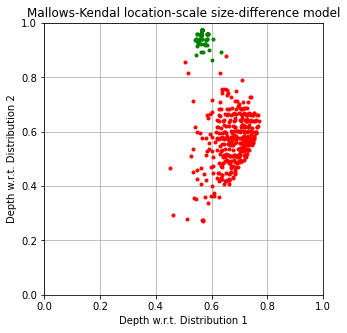

In [42]:
plt.close("all")
plt.figure(1, figsize=(5, 5))
plt.title(modelNames[iModel] + " model")
plt.plot(depths1[:,0], depths1[:,1], 'r.')
plt.plot(depths2[:,0], depths2[:,1], 'g.')
plt.xlabel("Depth w.r.t. Distribution 1")
plt.ylabel("Depth w.r.t. Distribution 2")
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.grid()
plt.savefig("pic-ddplot-n10-" + modelShorts[iModel] + ".pdf")